# Multiclass Classification of predicting Cirrhosis

# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import mstats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [4]:
train = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\train.csv\train.csv")
train.head(3)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1086.0,NaN,18628.0,F,NaN,NaN,NaN,N,0.9,NaN,3.01,NaN,NaN,NaN,NaN,244.0,10.0,2.0,C
1,1,3231.0,NaN,18263.0,F,NaN,NaN,NaN,N,0.9,NaN,4.01,NaN,NaN,NaN,NaN,244.0,10.9,2.0,C
2,2,1072.0,NaN,14245.0,F,NaN,NaN,NaN,N,1.0,NaN,3.50,NaN,NaN,NaN,NaN,209.0,10.8,2.0,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8581 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8585 non-null   object 
 6   Hepatomegaly   8581 non-null   object 
 7   Spiders        8574 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6704 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8469 non-null   float64
 13  Alk_Phos       8573 non-null   float64
 14  SGOT           8570 non-null   float64
 15  Tryglicerides  6648 non-null   float64
 16  Platelets      14421 non-null  float64
 17  Prothrombin    14978 non-null  float64
 18  Stage 

In [8]:
train.isnull().sum()/len(train)*100

id                0.000000
N_Days            0.000000
Drug             42.793333
Age               0.000000
Sex               0.000000
Ascites          42.766667
Hepatomegaly     42.793333
Spiders          42.840000
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.306667
Albumin           0.000000
Copper           43.540000
Alk_Phos         42.846667
SGOT             42.866667
Tryglicerides    55.680000
Platelets         3.860000
Prothrombin       0.146667
Stage             0.000000
Status            0.000000
dtype: float64

Since more than 50% of the data is missing we can drop cholesterol and tryglycerides

In [10]:
train_new=train.copy()
train_new.drop('id',axis=1,inplace=True)

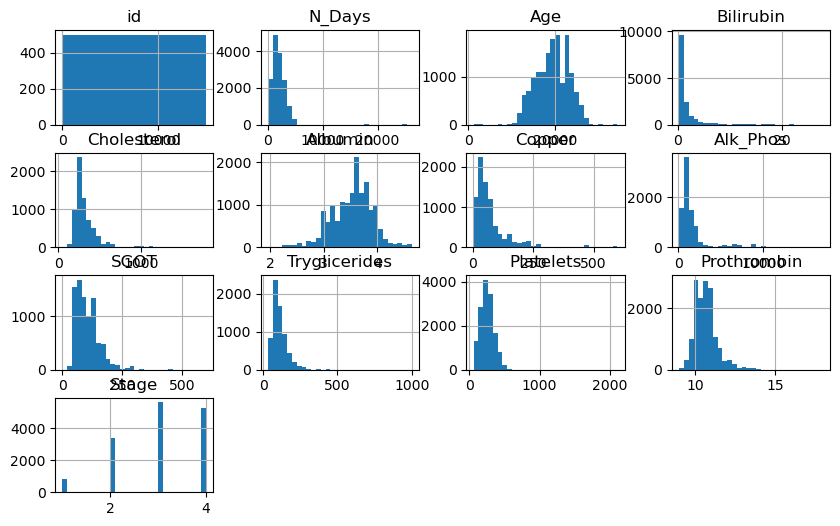

<Figure size 640x480 with 0 Axes>

In [137]:
train.hist(bins = 30, figsize = (10,6))
plt.show()
plt.tight_layout()

 - id: The first plot shows the distribution of the "id" column, which seems to represent unique patient IDs. The uniform distribution implies that each ID occurs only once.

 - N_Days: This might represent the number of days a patient spent in a hospital or under observation. The histogram shows a right-skewed distribution, meaning that the majority of patients had short stays, with fewer having longer durations.

 - Age: The age distribution is approximately normal (bell-shaped), with most patients falling within a central age range.

 - Bilirubin: This is a liver function test. The histogram is highly skewed to the right, meaning most patients have low bilirubin levels, while a few have significantly higher levels.

 - Cholesterol: The cholesterol values seem to be zero for many patients, which could either indicate missing data or that patients had normal/undetectable cholesterol levels.

 - Albumin: This protein level in the blood shows a right-skewed distribution, with most patients having low to moderate albumin levels.

 - Copper: Copper concentration is shown with most values clustering towards the lower end of the distribution.

 - Alk_Phos: Alkaline Phosphatase (ALP), another liver function test, has a distribution where the majority of patients have low levels, with a few outliers having high levels.

 - SGOT: This test measures liver enzymes, with a significant portion of patients having very low values and a few showing higher values.

 - Tryglicerides: The distribution shows a small number of patients with elevated triglycerides, with the majority of values near zero.

 - Platelets: The platelet count shows a moderately skewed distribution, with most patients having normal platelet levels and a few having higher counts.

 - Prothrombin: A blood clotting measure, this histogram shows most patients have similar prothrombin levels, clustered in a narrow range.

 - Stage: The distribution of the “Stage” feature shows that a large portion of patients are in the early stages of the condition, with fewer in more advanced stages.

The overall pattern shows several right-skewed distributions (indicating that a majority of values are clustered at the low end, with fewer outliers at higher values), along with a few normal or near-normal distributions.

# Handling missing values for numerical columns

In [12]:
numcol_train=train.select_dtypes('number')

In [15]:
import pandas as pd
from sklearn.impute import KNNImputer

numcol_train = train_new.select_dtypes(include=['float64', 'int64']).columns
catcol_train = train_new.select_dtypes(include=['object']).columns

imputer = KNNImputer(n_neighbors=3)

train_new[numcol_train] = imputer.fit_transform(train_new[numcol_train])

train_new[catcol_train] = train[catcol_train]

In [16]:
train_new.isnull().sum()

N_Days              0
Drug             6419
Age                 0
Sex                 0
Ascites          6415
Hepatomegaly     6419
Spiders          6426
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
Status              0
dtype: int64

# Handling missing values for categorical column

In [19]:
catcol_train = train_new.select_dtypes('object')

In [21]:
a=train_new['Drug'].fillna(train_new['Drug'].mode()[0],inplace=True)
b=train_new['Ascites'].fillna(train_new['Ascites'].mode()[0],inplace=True)
c=train_new['Hepatomegaly'].fillna(train_new['Hepatomegaly'].mode()[0],inplace=True)
d=train_new['Spiders'].fillna(train_new['Spiders'].mode()[0],inplace=True)
e=train_new['Cholesterol'].fillna(train_new['Cholesterol'].mode()[0],inplace=True)
f=train_new['Copper'].fillna(train_new['Copper'].mode()[0],inplace=True)
g=train_new['Alk_Phos'].fillna(train_new['Alk_Phos'].mode()[0],inplace=True)
h=train_new['SGOT'].fillna(train_new['SGOT'].mode()[0],inplace=True)
i=train_new['Tryglicerides'].fillna(train_new['Tryglicerides'].mode()[0],inplace=True)
j=train_new['Platelets'].fillna(train_new['Platelets'].mode()[0],inplace=True)
k=train_new['Prothrombin'].fillna(train_new['Prothrombin'].mode()[0],inplace=True)

In [23]:
train_new.isnull().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

# Outliers

In [25]:
def remove_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    #Define outlier boundries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return df

if train_new is not None:
  numcol_train = train_new.select_dtypes('number').columns
  train_new = remove_outliers(train_new, numcol_train)
else:
  print("train_new is None")

train_new=remove_outliers(train_new,numcol_train)


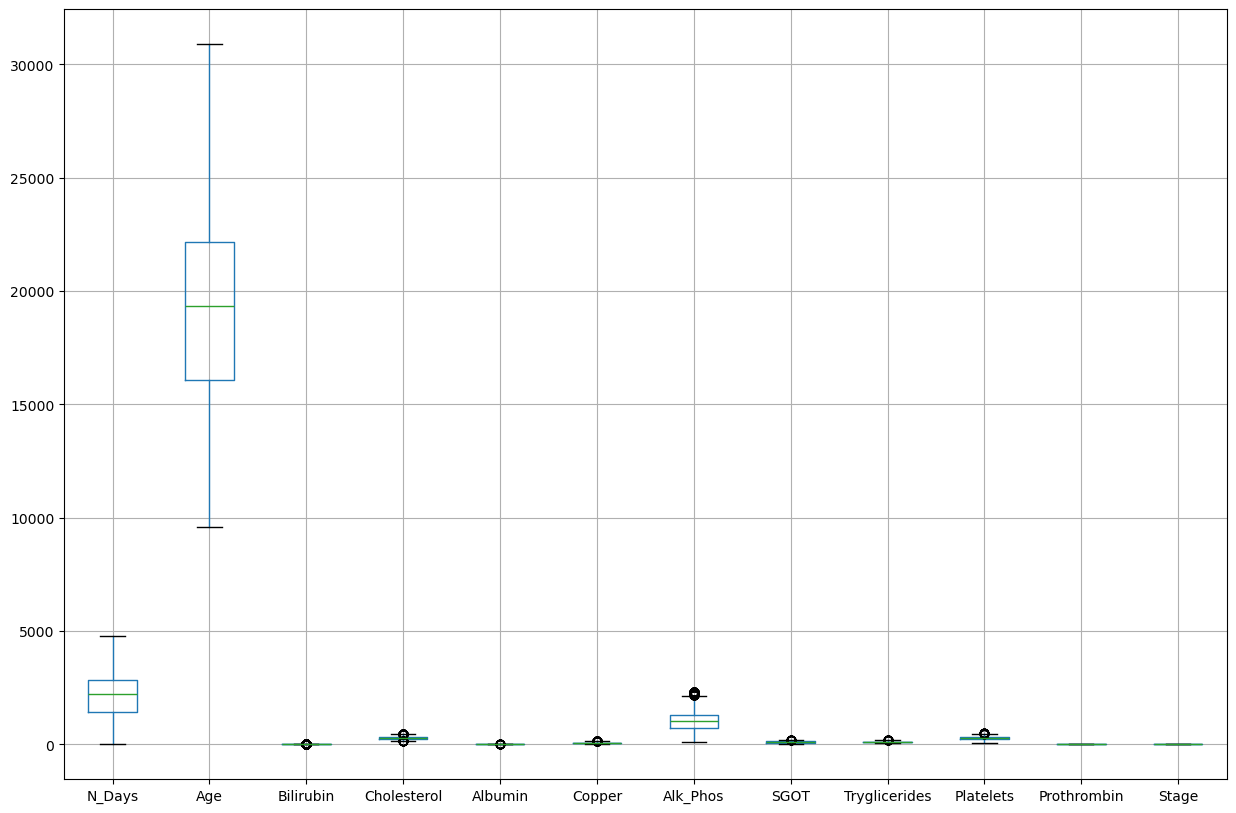

In [27]:
plt.figure(figsize=(15,10))
train_new[numcol_train].boxplot()
plt.show()

# LabelEncoding

In [29]:
le=LabelEncoder()

In [31]:
train_new['Spiders'] = le.fit_transform(train_new['Spiders'])
train_new['Drug'] = le.fit_transform(train_new['Drug'])
train_new['Sex'] = le.fit_transform(train_new['Sex'])
train_new['Ascites'] = le.fit_transform(train_new['Ascites'])
train_new['Hepatomegaly'] = le.fit_transform(train_new['Hepatomegaly'])
train_new['Edema'] = le.fit_transform(train_new['Edema'])

In [33]:
train_encoded = train_new.copy()

#Preprocessing the test data

In [36]:
test = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\test.csv")
test.head(3)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,2055.0,D-penicillamine,12398.0,F,N,N,N,N,0.9,304.0,3.00,75.0,1622.0,116.25,169.0,358.0,9.9,1.0
1,15001,71.0,D-penicillamine,20442.0,F,Y,Y,Y,Y,2.1,178.0,3.08,558.0,6064.8,227.04,191.0,165.0,12.0,4.0
2,15002,3336.0,D-penicillamine,23011.0,F,N,N,N,N,0.7,251.0,3.35,30.0,662.0,57.35,107.0,344.0,10.7,2.0


In [38]:
test.isnull().sum()/len(test)*100

id                0.00
N_Days            0.00
Drug             43.73
Age               0.00
Sex               0.00
Ascites          43.60
Hepatomegaly     43.73
Spiders          43.73
Edema             0.00
Bilirubin         0.01
Cholesterol      55.90
Albumin           0.00
Copper           44.33
Alk_Phos         43.72
SGOT             43.76
Tryglicerides    56.27
Platelets         4.03
Prothrombin       0.18
Stage             0.00
dtype: float64

Since more than 50% of the data is missing we can drop cholesterol and tryglycerides

In [41]:
test_new=test.copy()

# Handling missing values for numerical columns

In [44]:
numcol_test=test.select_dtypes('number')
numcol_test.drop(columns='id',inplace=True)

In [47]:
import pandas as pd
from sklearn.impute import KNNImputer

numcol_test = test_new.select_dtypes(include=['float64', 'int64']).columns
catcol_test = test_new.select_dtypes(include=['object']).columns

imputer = KNNImputer(n_neighbors=3)

test_new[numcol_test] = imputer.fit_transform(test_new[numcol_test])

test_new[catcol_test] = test[catcol_test]

In [49]:
test_new.isnull().sum()

id                  0
N_Days              0
Drug             4373
Age                 0
Sex                 0
Ascites          4360
Hepatomegaly     4373
Spiders          4373
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
dtype: int64

# Handling missing values for categorical columns

In [51]:
a=test_new['Drug'].fillna(test_new['Drug'].mode()[0],inplace=True)
b=test_new['Ascites'].fillna(test_new['Ascites'].mode()[0],inplace=True)
c=test_new['Hepatomegaly'].fillna(test_new['Hepatomegaly'].mode()[0],inplace=True)
d=test_new['Spiders'].fillna(test_new['Spiders'].mode()[0],inplace=True)


In [53]:
test_new.shape

(10000, 19)

In [55]:
test_new.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [57]:
test_new.shape

(10000, 19)

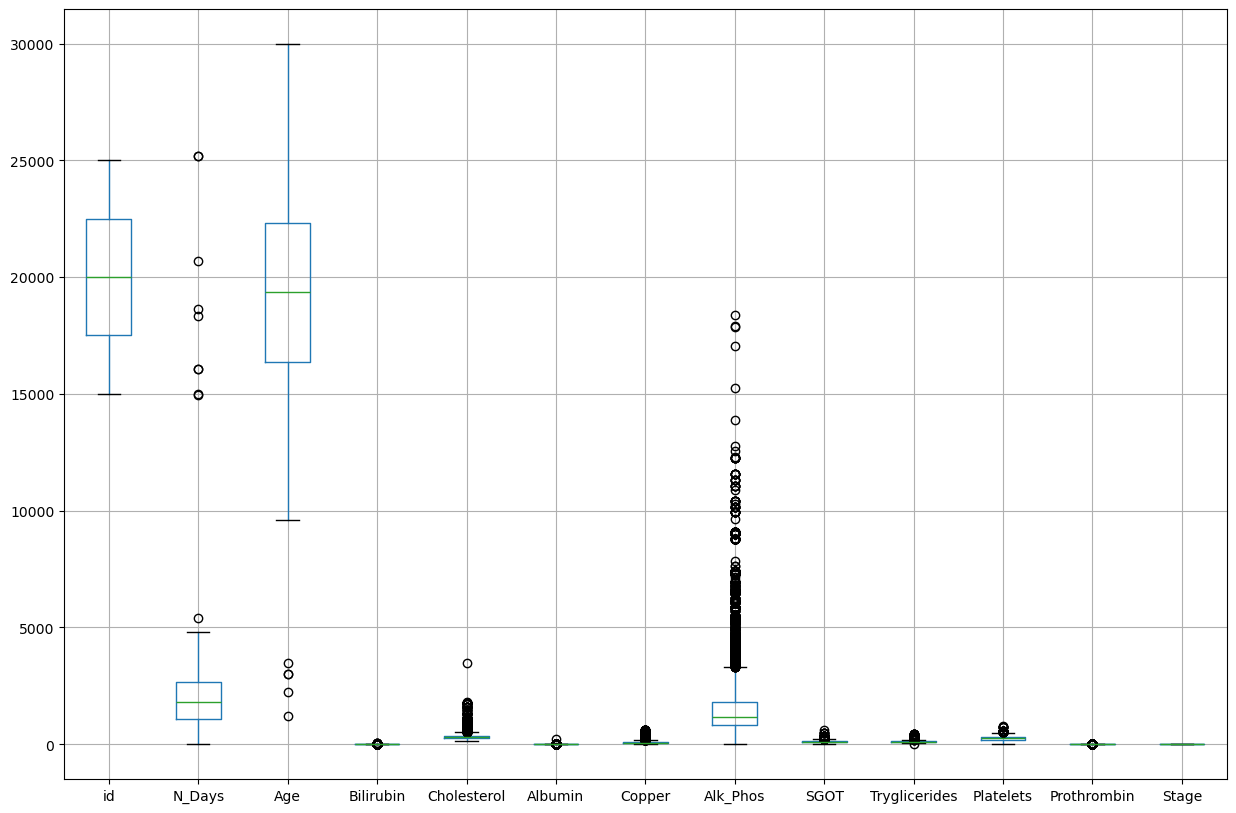

In [59]:
plt.figure(figsize=(15,10))
test_new[numcol_test].boxplot()
plt.show()

In [61]:
test_new.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000.0,2055.0,D-penicillamine,12398.0,F,N,N,N,N,0.9,304.000000,3.00,75.000000,1622.0,116.250000,169.000000,358.0,9.9,1.0
1,15001.0,71.0,D-penicillamine,20442.0,F,Y,Y,Y,Y,2.1,178.000000,3.08,558.000000,6064.8,227.040000,191.000000,165.0,12.0,4.0
2,15002.0,3336.0,D-penicillamine,23011.0,F,N,N,N,N,0.7,251.000000,3.35,30.000000,662.0,57.350000,107.000000,344.0,10.7,2.0
3,15003.0,1150.0,D-penicillamine,18993.0,F,N,N,N,N,0.9,591.333333,3.29,53.666667,2099.0,143.116667,117.666667,256.0,10.8,2.0
4,15004.0,2363.0,D-penicillamine,18118.0,F,N,Y,N,N,0.9,315.000000,3.40,35.000000,1840.0,170.500000,70.000000,356.0,10.9,2.0


In [63]:
test_new.shape

(10000, 19)

#LabelEncoding

In [65]:
le = LabelEncoder()

In [67]:
test_new['Spiders'] = le.fit_transform(test_new['Spiders'])
test_new['Drug'] = le.fit_transform(test_new['Drug'])
test_new['Sex'] = le.fit_transform(test_new['Sex'])
test_new['Ascites'] = le.fit_transform(test_new['Ascites'])
test_new['Hepatomegaly'] = le.fit_transform(test_new['Hepatomegaly'])
test_new['Edema'] = le.fit_transform(test_new['Edema'])
test_new['id'] = le.fit_transform(test_new['id'])

In [69]:
test_encoded = test_new.copy()

In [71]:
test_encoded

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2055.0,0,12398.0,0,0,0,1,0,0.9,304.000000,3.00,75.000000,1622.000000,116.250000,169.000000,358.0,9.9,1.0
1,1,71.0,0,20442.0,0,1,1,2,2,2.1,178.000000,3.08,558.000000,6064.800000,227.040000,191.000000,165.0,12.0,4.0
2,2,3336.0,0,23011.0,0,0,0,1,0,0.7,251.000000,3.35,30.000000,662.000000,57.350000,107.000000,344.0,10.7,2.0
3,3,1150.0,0,18993.0,0,0,0,1,0,0.9,591.333333,3.29,53.666667,2099.000000,143.116667,117.666667,256.0,10.8,2.0
4,4,2363.0,0,18118.0,0,0,1,1,0,0.9,315.000000,3.40,35.000000,1840.000000,170.500000,70.000000,356.0,10.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,559.0,0,23011.0,0,0,0,1,1,0.6,314.666667,3.04,43.000000,974.333333,110.050000,71.333333,160.0,11.8,3.0
9996,9996,2698.0,0,22646.0,0,0,0,1,0,0.6,299.333333,3.29,28.000000,3617.933333,106.433333,90.000000,155.0,10.4,3.0
9997,9997,1092.0,0,14610.0,0,0,0,1,0,2.8,449.333333,3.46,109.666667,1554.333333,164.563333,85.666667,337.0,10.4,1.0
9998,9998,785.0,0,19358.0,0,0,0,1,0,14.0,318.000000,3.15,62.666667,782.666667,72.850000,106.000000,142.0,11.8,4.0


In [73]:
test_encoded.shape

(10000, 19)

In [87]:
X_train = train_encoded.drop(columns=['Status'])
y_train = train_encoded['Status']

X_test = test_encoded
X_test = test_encoded.drop(columns='id')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Decision Tree

In [93]:
X = test_new.drop('Stage', axis=1)  # Features
y = test_new['Stage']     

In [101]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 46.65%
Confusion Matrix:
[[ 12  29  62  13]
 [ 37 120 193  82]
 [ 55 198 359 157]
 [ 18  75 148 442]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.10      0.10      0.10       116
         2.0       0.28      0.28      0.28       432
         3.0       0.47      0.47      0.47       769
         4.0       0.64      0.65      0.64       683

    accuracy                           0.47      2000
   macro avg       0.37      0.37      0.37      2000
weighted avg       0.47      0.47      0.47      2000



In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

import warnings 
warnings.filterwarnings('ignore')

# Set up the parameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error']
}

# Set up Grid Search
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test set score of the best model: {test_score:.2f}")

Best parameters found:  {'criterion': 'poisson', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test set score of the best model: 0.25


In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error']
}

df = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=df, param_distributions=param_grid,cv=5,random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'poisson'}


# Logistic Regression

In [118]:
X = train_new.drop(columns=['Status'])  # Drop 'Status' as it's the target
y = train_new['Status'] 

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# Step 1: Prepare features (X) and target (y)
X = train_new.drop(columns=['Status'])  # Drop 'Status' as it's the target
y = train_new['Status']  

# Step 2: Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the model
model = LogisticRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8497409326424871
Classification Report:
               precision    recall  f1-score   support

           C       0.85      0.99      0.92      1315
          CL       0.00      0.00      0.00        22
           D       0.36      0.02      0.04       207

    accuracy                           0.85      1544
   macro avg       0.41      0.34      0.32      1544
weighted avg       0.78      0.85      0.79      1544



In [126]:
submission_df = pd.DataFrame(y_test, columns=['Status_C', 'Status_CL', 'Status_D'])
submission_df['id'] = test['id']
submission_df.to_csv('submission.csv', index=False)

In [128]:
submission_df.head()

,Status_C,Status_CL,Status_D,id
0,NaN,NaN,NaN,15000
1,NaN,NaN,NaN,15001
2,NaN,NaN,NaN,15002
3,NaN,NaN,NaN,15003
4,NaN,NaN,NaN,15004
